In [1]:

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


# Define the states and transition matrix
states = ["S", "R", "C"]
transition_matrix = np.array([[0.7, 0.2, 0.1], [0.4, 0.4, 0.2], [0.3, 0.3, 0.4]])

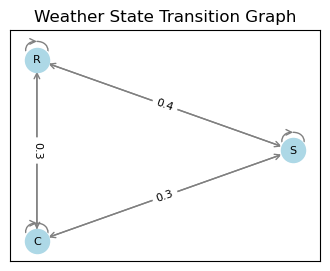

In [2]:
#Plot the graph 
# Create a directed graph from the transition matrix
G = nx.DiGraph()

# Add edges with weights from the transition matrix
for i, state_from in enumerate(states):
    for j, state_to in enumerate(states):
        weight = transition_matrix[i][j]
        G.add_edge(state_from, state_to, weight=weight)

# Define positions for nodes
pos = nx.circular_layout(G)  # Arrange nodes in a circular layout

# Draw the graph
plt.figure(figsize=(4, 3))
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="lightblue")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=10, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

# Add edge labels (transition probabilities)
edge_labels = {(state_from, state_to): f"{data['weight']:.1f}" 
               for state_from, state_to, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Weather State Transition Graph")
plt.show()

In [3]:

# Lets use Markov Chain to predict the weather for the next 2 days
# Initial state distribution (assuming starting in state "S")
initial_state = np.array([1, 0, 0])  # 100% chance of starting in state "S"

# Number of days to predict
num_days = 2

# Initialize the state distribution
state_distribution = initial_state.copy()


# Store the state distributions for each day
state_distributions = [state_distribution.copy()]

# Iterate through each day to predict the weather
for day in range(num_days):
    # Update the state distribution using the transition matrix
    state_distribution = np.dot(state_distribution, transition_matrix)
    state_distributions.append(state_distribution.copy())

# Print the predicted state distributions for each day
print("Predicted state distributions for each day:")
for day, distribution in enumerate(state_distributions):
    print(f"Day {day}: {distribution}")

# Convert state distributions to percentages
state_distributions_percentage = [dist * 100 for dist in state_distributions]

Predicted state distributions for each day:
Day 0: [1 0 0]
Day 1: [0.7 0.2 0.1]
Day 2: [0.6  0.25 0.15]


Acitivity

In [4]:
#1
import numpy as np

# Define the states and transition matrix
states = ["Pizza", "Burger", "Pasta"]
transition_matrix = np.array([
    [0.5, 0.3, 0.2],  # Transition probabilities from "Pizza"
    [0.2, 0.6, 0.2],  # Transition probabilities from "Burger"
    [0.3, 0.3, 0.4]   # Transition probabilities from "Pasta"
])

# Initial state distribution (assuming starting with "Pizza")
initial_state = np.array([1, 0, 0])  # 100% chance of starting with "Pizza"

# Number of days to predict
num_days = 10

# Initialize the state distribution
state_distribution = initial_state.copy()

# Iterate through each day to predict the food item
for day in range(num_days):
    # Update the state distribution using the transition matrix
    state_distribution = np.dot(state_distribution, transition_matrix)

# Print the predicted state distribution after 10 days
print("Predicted state distribution after 10 days:")
for state, probability in zip(states, state_distribution):
    print(f"{state}: {probability * 100:.2f}%")

# Determine the most likely food item to be served
most_likely_state = states[np.argmax(state_distribution)]
print(f"\nMost likely food item to be served after 10 days: {most_likely_state}")

Predicted state distribution after 10 days:
Pizza: 32.14%
Burger: 42.86%
Pasta: 25.00%

Most likely food item to be served after 10 days: Burger


In [7]:
#2
import numpy as np

# Define the states and transition matrix
states = ["Dry", "Damp", "Wet"]
transition_matrix = np.array([
    [0.6, 0.3, 0.1],  # Transition probabilities from "Dry"
    [0.4, 0.4, 0.2],  # Transition probabilities from "Damp"
    [0.2, 0.5, 0.3]   # Transition probabilities from "Wet"
])

# Initial state distribution (assuming starting with "Dry")
initial_state = np.array([1, 0, 0])  # 100% chance of starting with "Dry"

# Number of days to predict
num_days = 10

# Initialize the state distribution
state_distribution = initial_state.copy()

# Store the state distributions for each day
state_distributions = [state_distribution.copy()]

# Iterate through each day to predict the weather
for day in range(num_days):
    # Update the state distribution using the transition matrix
    state_distribution = np.dot(state_distribution, transition_matrix)
    state_distributions.append(state_distribution.copy())

# Print the predicted state distributions for each day
print("Predicted state distributions for each day:")
for day, distribution in enumerate(state_distributions):
    print(f"Day {day}: {distribution}")

# Convert state distributions to percentages
state_distributions_percentage = [dist * 100 for dist in state_distributions]

# Print the most likely state after 10 days
most_likely_state = states[np.argmax(state_distributions[-1])]
print(f"\nMost likely weather state after {num_days} days: {most_likely_state}")

Predicted state distributions for each day:
Day 0: [1 0 0]
Day 1: [0.6 0.3 0.1]
Day 2: [0.5  0.35 0.15]
Day 3: [0.47  0.365 0.165]
Day 4: [0.461  0.3695 0.1695]
Day 5: [0.4583  0.37085 0.17085]
Day 6: [0.45749  0.371255 0.171255]
Day 7: [0.457247  0.3713765 0.1713765]
Day 8: [0.4571741  0.37141295 0.17141295]
Day 9: [0.45715223 0.37142389 0.17142389]
Day 10: [0.45714567 0.37142717 0.17142717]

Most likely weather state after 10 days: Dry
